In [1]:
import requests
import zipfile
import io
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://www.kaggle.com/api/v1/datasets/download/itsmesunil/bank-loan-modelling"

response = requests.get(url, allow_redirects=True)
if response.status_code == 200:
    print("Download completed ✅")
else:
    raise Exception(f"failed download: {response.status_code}")

zip_file = zipfile.ZipFile(io.BytesIO(response.content))
print("Archivos en el zip:", zip_file.namelist())

excel_filename = zip_file.namelist()[0]  # primer archivo dentro del zip
excel = pd.ExcelFile(zip_file.open(excel_filename))
print("Hojas disponibles:", excel.sheet_names)

df = pd.read_excel(excel, sheet_name=1)  # segunda hoja

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

aliquota = df.sample(n=50, random_state=32)
aliquota.to_csv("aliquota_test.csv", index=False)

df_train = df.drop(aliquota.index).reset_index(drop=True)
df=df_train

print("rows for model:", len(df_train))
print("ficticious new rows:", len(aliquota))


Download completed ✅
Archivos en el zip: ['Bank_Personal_Loan_Modelling.xlsx']
Hojas disponibles: ['Description', 'Data']
rows for model: 4950
ficticious new rows: 50


In [17]:
df.head(20)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


Data Analysis

Basic exploration data


In [9]:
df.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4946,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
1755,1774,31,5,28,92037,4,0.8,1,0,0,0,0,0,0
3642,3683,43,17,45,95051,2,0.7,1,0,0,0,0,0,0
1031,1042,56,32,51,92780,4,1.5,1,0,0,0,0,0,0
557,566,55,29,79,90210,3,0.8,1,0,0,0,0,1,0


In [10]:
df.shape

(4950, 14)

In [2]:
round(df.describe(),2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4950.00,4950.00,4950.00,4950.00,4950.00,4950.00,4950.00,4950.00,4950.00,4950.00,4950.00,4950.00,4950.00,4950.00
mean,2501.51,45.36,20.13,73.79,93153.71,2.40,1.94,1.88,56.53,0.10,0.10,0.06,0.60,0.29
std,1443.65,11.46,11.47,46.04,2125.15,1.15,1.75,0.84,101.79,0.29,0.31,0.24,0.49,0.46
min,1.00,23.00,-3.00,8.00,9307.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1249.25,35.00,10.00,39.00,91918.50,1.00,0.70,1.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2500.50,45.00,20.00,64.00,93437.00,2.00,1.50,2.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,3752.75,55.00,30.00,98.00,94608.00,3.00,2.50,3.00,101.00,0.00,0.00,0.00,1.00,1.00
max,5000.00,67.00,43.00,224.00,96651.00,4.00,10.00,3.00,635.00,1.00,1.00,1.00,1.00,1.00


In [3]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
correlation_matrix = df.corr(numeric_only=True)

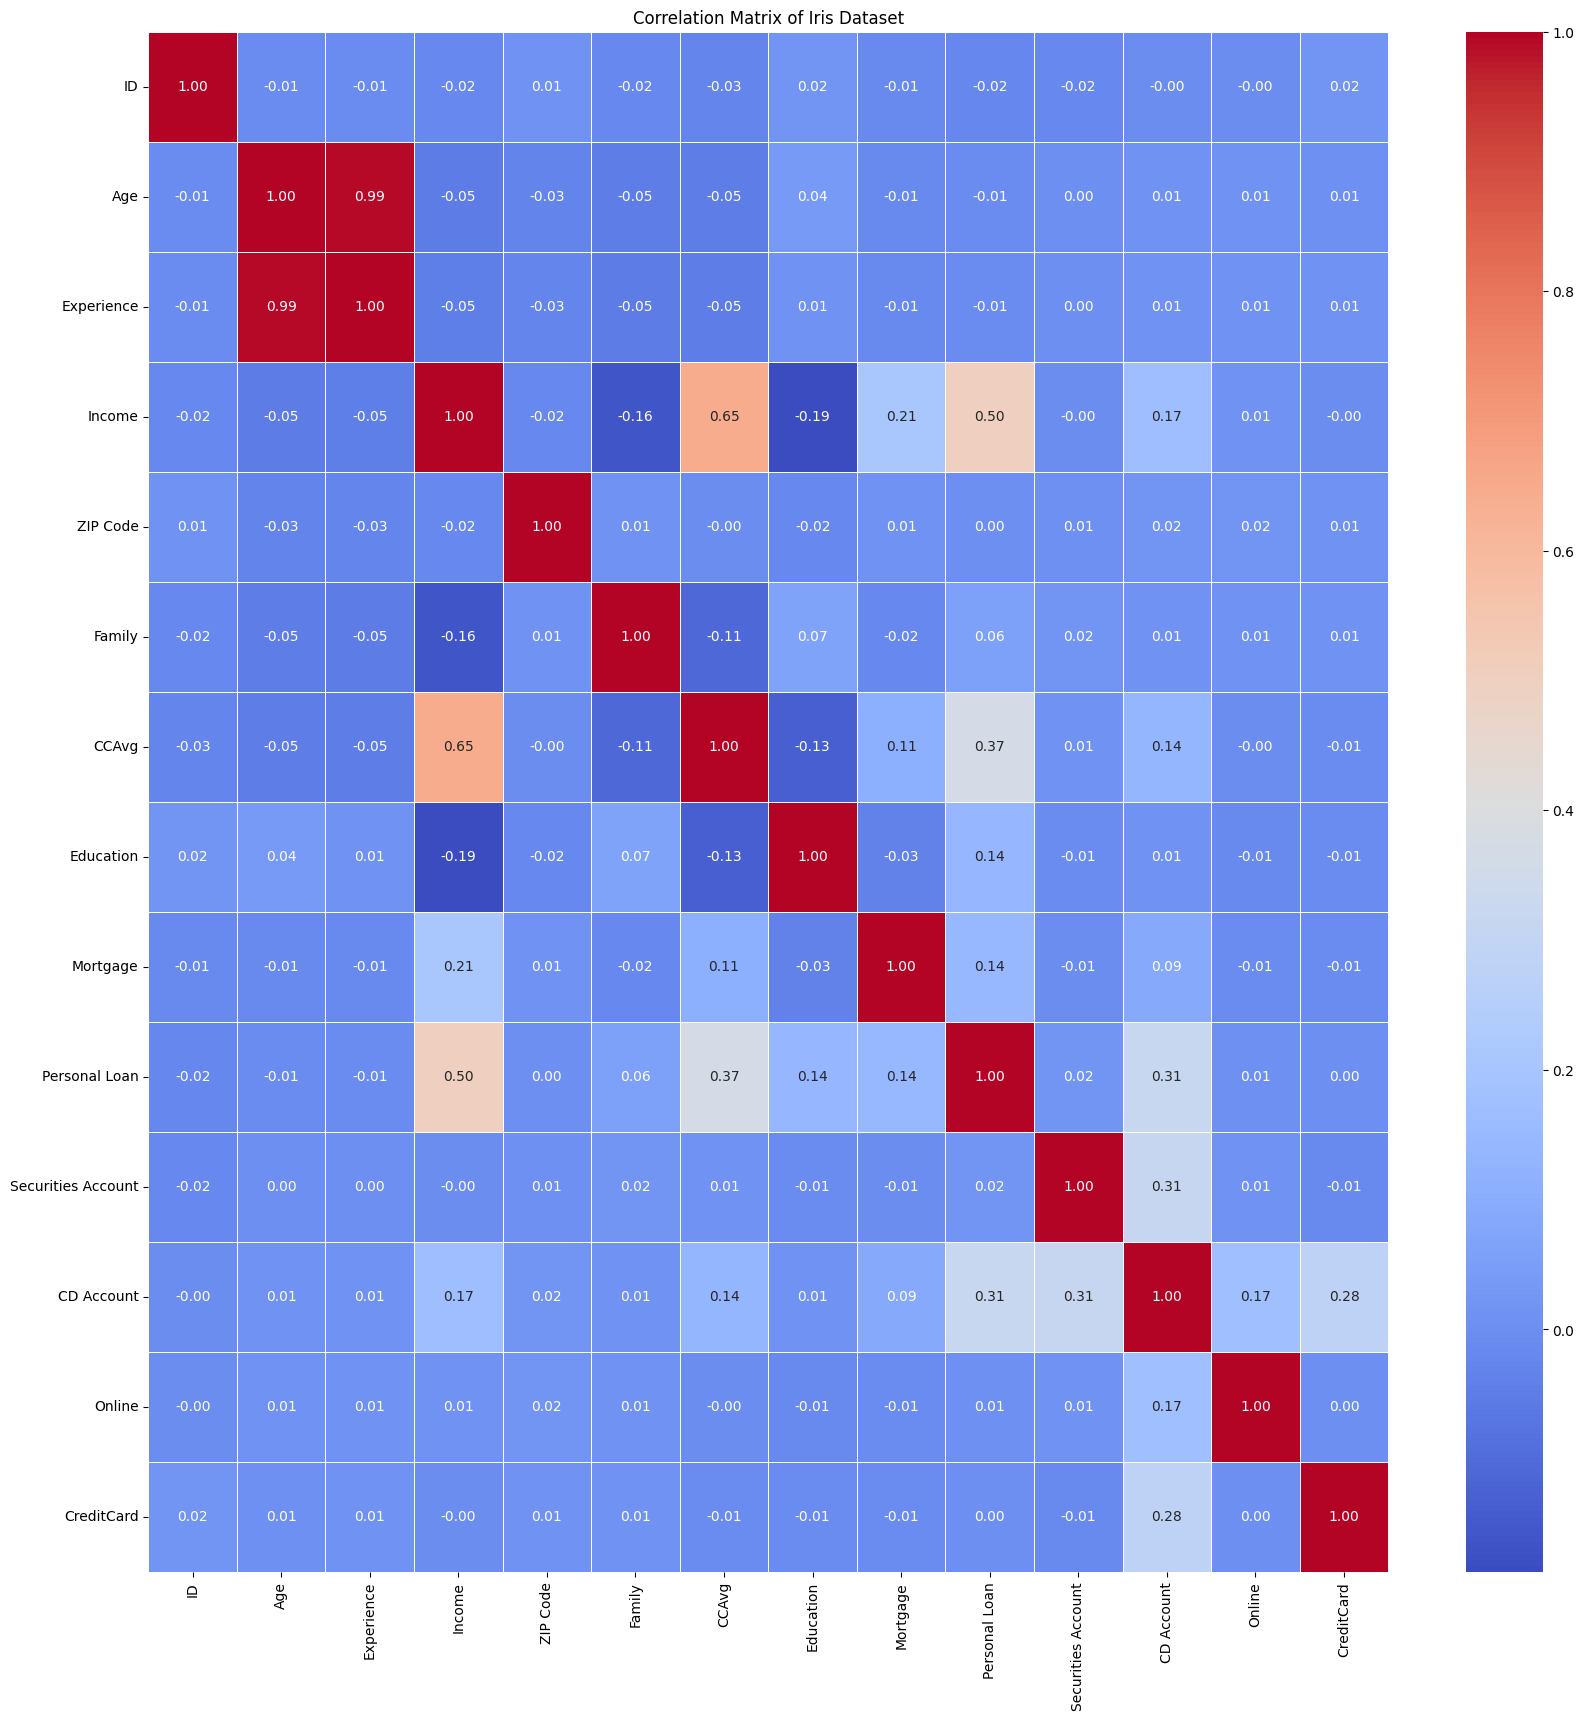

In [5]:
plt.pyplot.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.pyplot.title('Correlation Matrix of Iris Dataset')
plt.pyplot.show()

XGBoost Classifier

In [2]:
import pandas as pd
import random
import time
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

y = df['Personal Loan']  # target
X = df.drop('Personal Loan', axis=1)  # features

def test_model(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted', zero_division=0),
        'recall': recall_score(y_test, y_pred, average='weighted', zero_division=0),
        'f1_score': f1_score(y_test, y_pred, average='weighted', zero_division=0)
    }

results = []
start_total = time.time()

for i in range(1, 101):
    print(f"Ejecutando iteración {i}/100...")
    start_iter = time.time()


    e = random.randint(10, 300)   
    d = random.randint(3, 15)     
    r = random.randint(1, 300)    

   
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=r, stratify=y
    )
    original_distribution = dict(Counter(y_train))


    smote = SMOTE(random_state=r)
    X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
    

    res_distribution = dict(Counter(y_train_res))

    xgb_clf = XGBClassifier(
        n_estimators=e,
        max_depth=d,
        random_state=r,
        eval_metric='logloss',
        n_jobs=-1
    )
    xgb_metrics = test_model(xgb_clf, X_train_res, y_train_res, X_test, y_test)

    results.append({
        'n_estimators': e,
        'max_depth': d,
        'random_state': r,
        'original_distribution': original_distribution,
        'resampled_distribution': res_distribution,
        'xgb_accuracy': xgb_metrics['accuracy'],
        'xgb_precision': xgb_metrics['precision'],
        'xgb_recall': xgb_metrics['recall'],
        'xgb_f1_score': xgb_metrics['f1_score']
    })

    end_iter = time.time()
    print(f"Iteración {i} completada en {(end_iter - start_iter)/60:.2f} minutos.\n")

end_total = time.time()
print(f"Proceso completo en {(end_total - start_total)/60:.2f} minutos.")

results_df = pd.DataFrame(results)


Ejecutando iteración 1/100...
Iteración 1 completada en 0.00 minutos.

Ejecutando iteración 2/100...
Iteración 2 completada en 0.00 minutos.

Ejecutando iteración 3/100...
Iteración 3 completada en 0.00 minutos.

Ejecutando iteración 4/100...
Iteración 4 completada en 0.00 minutos.

Ejecutando iteración 5/100...
Iteración 5 completada en 0.01 minutos.

Ejecutando iteración 6/100...
Iteración 6 completada en 0.00 minutos.

Ejecutando iteración 7/100...
Iteración 7 completada en 0.00 minutos.

Ejecutando iteración 8/100...
Iteración 8 completada en 0.01 minutos.

Ejecutando iteración 9/100...
Iteración 9 completada en 0.00 minutos.

Ejecutando iteración 10/100...
Iteración 10 completada en 0.01 minutos.

Ejecutando iteración 11/100...
Iteración 11 completada en 0.01 minutos.

Ejecutando iteración 12/100...
Iteración 12 completada en 0.01 minutos.

Ejecutando iteración 13/100...
Iteración 13 completada en 0.01 minutos.

Ejecutando iteración 14/100...
Iteración 14 completada en 0.00 minuto

In [3]:
results_df.sort_values(by='xgb_accuracy',ascending=False).head(3)

,n_estimators,max_depth,random_state,original_distribution,resampled_distribution,xgb_accuracy,xgb_precision,xgb_recall,xgb_f1_score
6,86,7,194,"{0: 3133, 1: 332}","{0: 3133, 1: 3133}",0.983838,0.984944,0.983838,0.984173
39,290,11,169,"{1: 332, 0: 3133}","{1: 3133, 0: 3133}",0.983165,0.983636,0.983165,0.983344
80,167,9,287,"{0: 3133, 1: 332}","{0: 3133, 1: 3133}",0.983165,0.984406,0.983165,0.983537


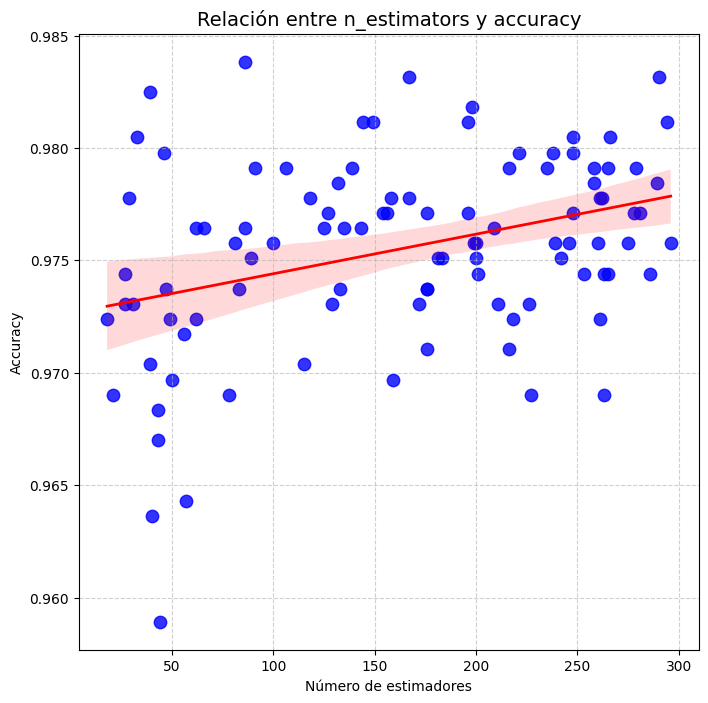

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
sns.regplot(
    x="n_estimators", 
    y="xgb_accuracy", 
    data=results_df,
    scatter_kws={"s": 80, "color": "blue"},
    line_kws={"color": "red", "linewidth": 2}
)
plt.title("Relación entre n_estimators y accuracy", fontsize=14)
plt.xlabel("Número de estimadores")
plt.ylabel("Accuracy")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


Final model

In [5]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


y = df['Personal Loan']  # target
X = df.drop('Personal Loan', axis=1)  # features

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=194, stratify=y
)

print("original distribution:", dict(Counter(y_train)))


smote = SMOTE(random_state=194)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
print("distribution after smote:", dict(Counter(y_train_res)))

# i use the best hyperparameters of my for loop model
model = XGBClassifier(
    n_estimators=66,
    max_depth=13,
    random_state=194,
    eval_metric='logloss',
    n_jobs=-1
)

model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


original distribution: {0: 3133, 1: 332}
distribution after smote: {0: 3133, 1: 3133}
Accuracy: 0.9872
Precision: 0.9876
Recall: 0.9872
F1-score: 0.9873


Now, we test the modulo with our aliquota 

In [6]:
df_test=pd.read_csv(r'C:\Users\alejo\Desktop\BYUI\CSE-310 LOCAL\CSE-310\module-1-ML-PREAPPROVEDAPP\aliquota_test.csv')
df_test.head(2)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3280,26,-1,44,94901,1,2.0,2,0,0,0,0,0,0
1,1824,33,8,125,91320,1,0.0,1,0,0,0,0,1,1


In [7]:
df_predicction=df_test.drop("Personal Loan", axis=1).values
new_pred = model.predict(df_predicction)

predictions = pd.DataFrame(new_pred, columns=['Personal Loan'])

predictions.to_csv("Personal Loan-predictions.csv", index=False)

checking predicctions

Accuracy: 0.9800
Precision: 0.9833
Recall: 0.9800
F1-score: 0.9808
[[44  1]
 [ 0  5]]
[[0.97777778 0.02222222]
 [0.         1.        ]]


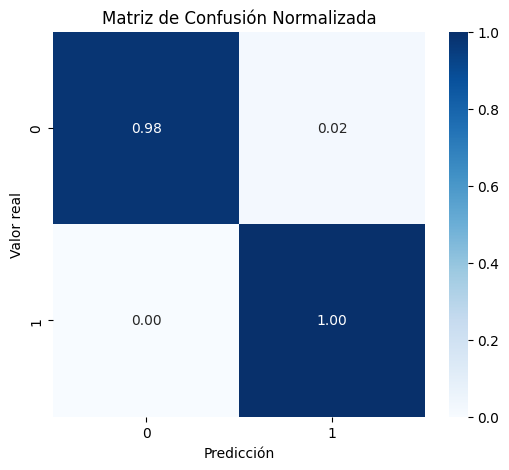

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

accuracy = accuracy_score(df_test['Personal Loan'],new_pred)
precision = precision_score(df_test['Personal Loan'], new_pred, average='weighted', zero_division=0)
recall = recall_score(df_test['Personal Loan'], new_pred, average='weighted', zero_division=0)
f1 = f1_score(df_test['Personal Loan'], new_pred, average='weighted', zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


cm = confusion_matrix(df_test['Personal Loan'],new_pred)
print(cm)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cm_normalized)

plt.figure(figsize=(6,5))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=np.unique(df_test['Personal Loan']),
            yticklabels=np.unique(df_test['Personal Loan']))
plt.xlabel('Predicción')
plt.ylabel('Valor real')
plt.title('Matriz de Confusión Normalizada')
plt.show()


In [9]:
from sklearn.metrics import classification_report

print(classification_report(df_test['Personal Loan'], new_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.83      1.00      0.91         5

    accuracy                           0.98        50
   macro avg       0.92      0.99      0.95        50
weighted avg       0.98      0.98      0.98        50



In [10]:
model.save_model("preapprovedmodel.json")
